## 라이브러리 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import seaborn as sns

## 한글 폰트 세팅

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
plt.rcParams['font.family'] = 'NanumGothic' # 나눔바른고딕 적용하기

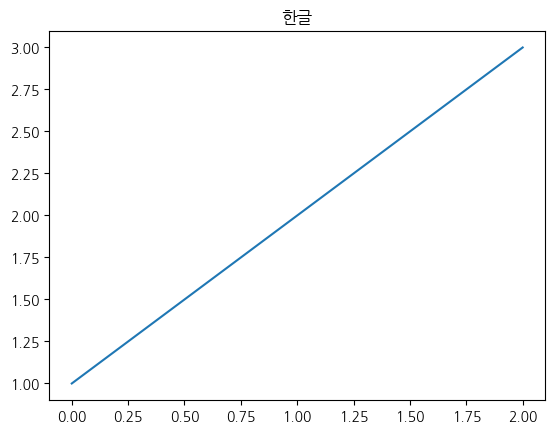

In [4]:
plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

## 데이터 불러오기

### 요일별 평균 혼잡도 (파이차트 용)

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
def process_subway_data(line_number):
    # 파일 경로 생성
    file_path = f'/content/drive/MyDrive/멀캠 자료/호선별데이터/은채님{line_number}호선.csv'

    # 데이터 불러오기
    data = pd.read_csv(file_path)

    # 2022년 데이터 필터링
    data_2022 = data[data['YEAR'] == 2022]

    # 요일별 상선, 하선 평균 혼잡도 계산
    avg_congestion_by_day = data_2022.groupby(['DAY', 'DIRECTION'])[['TIME_05', 'TIME_06', 'TIME_07', 'TIME_08', 'TIME_09', 'TIME_10', 'TIME_11', 'TIME_12', 'TIME_13', 'TIME_14', 'TIME_15', 'TIME_16', 'TIME_17', 'TIME_18', 'TIME_19', 'TIME_20', 'TIME_21', 'TIME_22', 'TIME_23', 'TIME_00']].mean()

    # 웹에서 사용할 데이터 구조 생성
    days_of_week = ['월', '화', '수', '목', '금', '토', '일']
    data_for_web = []

    for day in days_of_week:
        avg_congestion_day = avg_congestion_by_day.loc[day]

        data_entry_up = {
            'name': day,
            'direction': '상선',
            'y_avg': avg_congestion_day.loc['상선'].mean()
        }
        data_entry_down = {
            'name': day,
            'direction': '하선',
            'y_avg': avg_congestion_day.loc['하선'].mean()
        }

        data_for_web.append(data_entry_up)
        data_for_web.append(data_entry_down)

    return data_for_web

In [7]:
# 1호선부터 8호선까지의 데이터 처리
for i in range(1, 9):
    data_for_web = process_subway_data(i)

    # 결과 출력
    print(f'Line {i} 데이터:')
    for entry in data_for_web:
        print(entry)
    print('\n')

Line 1 데이터:
{'name': '월', 'direction': '상선', 'y_avg': 27.382874999999995}
{'name': '월', 'direction': '하선', 'y_avg': 28.4416875}
{'name': '화', 'direction': '상선', 'y_avg': 28.299354166666667}
{'name': '화', 'direction': '하선', 'y_avg': 29.39666666666667}
{'name': '수', 'direction': '상선', 'y_avg': 28.506999999999998}
{'name': '수', 'direction': '하선', 'y_avg': 29.60902083333333}
{'name': '목', 'direction': '상선', 'y_avg': 28.53404166666666}
{'name': '목', 'direction': '하선', 'y_avg': 29.638979166666672}
{'name': '금', 'direction': '상선', 'y_avg': 29.653645833333336}
{'name': '금', 'direction': '하선', 'y_avg': 30.812083333333334}
{'name': '토', 'direction': '상선', 'y_avg': 22.396875}
{'name': '토', 'direction': '하선', 'y_avg': 23.8820625}
{'name': '일', 'direction': '상선', 'y_avg': 11.785666666666666}
{'name': '일', 'direction': '하선', 'y_avg': 12.44375}


Line 2 데이터:
{'name': '월', 'direction': '상선', 'y_avg': 40.11758078231292}
{'name': '월', 'direction': '하선', 'y_avg': 39.71788265306123}
{'name': '화', 'directi

### 시간대별 평균 혼잡도 - 선 그래프용

In [8]:
def process_subway_data(line_number):
    # 파일 경로 생성
    file_path = f'/content/drive/MyDrive/멀캠 자료/호선별데이터/은채님{line_number}호선.csv'

    # 데이터 불러오기
    data = pd.read_csv(file_path)

    # 2022년 데이터 필터링
    data_2022 = data[data['YEAR'] == 2022]

    # 시간대별 상선, 하선 평균 혼잡도 계산
    avg_congestion_by_time_up = data_2022[data_2022['DIRECTION'] == '상선'][['TIME_05', 'TIME_06', 'TIME_07', 'TIME_08', 'TIME_09', 'TIME_10', 'TIME_11', 'TIME_12', 'TIME_13', 'TIME_14', 'TIME_15', 'TIME_16', 'TIME_17', 'TIME_18', 'TIME_19', 'TIME_20', 'TIME_21', 'TIME_22', 'TIME_23', 'TIME_00']].mean()
    avg_congestion_by_time_down = data_2022[data_2022['DIRECTION'] == '하선'][['TIME_05', 'TIME_06', 'TIME_07', 'TIME_08', 'TIME_09', 'TIME_10', 'TIME_11', 'TIME_12', 'TIME_13', 'TIME_14', 'TIME_15', 'TIME_16', 'TIME_17', 'TIME_18', 'TIME_19', 'TIME_20', 'TIME_21', 'TIME_22', 'TIME_23', 'TIME_00']].mean()

    # 시간대 리스트 생성 (예: 'TIME_05', 'TIME_06', ...)
    time_labels = [f'TIME_{i:02d}' for i in range(5, 24)] + ['TIME_00']

    # 상선 혼잡도 리스트 생성
    congestion_up = avg_congestion_by_time_up.values.tolist()

    # 하선 혼잡도 리스트 생성
    congestion_down = avg_congestion_by_time_down.values.tolist()

    # 웹에서 사용할 데이터 구조 생성
    data_for_web = {
        'time_labels': time_labels,
        'congestion_up': congestion_up,
        'congestion_down': congestion_down
    }

    return data_for_web

In [9]:
# 1호선부터 8호선까지의 데이터 처리
for i in range(1, 9):
    data_for_web = process_subway_data(i)

    # 결과 출력
    print(f'Line {i} 데이터:')
    print('Time Labels:', data_for_web['time_labels'])
    print('상선 혼잡도:', data_for_web['congestion_up'])
    print('하선 혼잡도:', data_for_web['congestion_down'])
    print('\n')

Line 1 데이터:
Time Labels: ['TIME_05', 'TIME_06', 'TIME_07', 'TIME_08', 'TIME_09', 'TIME_10', 'TIME_11', 'TIME_12', 'TIME_13', 'TIME_14', 'TIME_15', 'TIME_16', 'TIME_17', 'TIME_18', 'TIME_19', 'TIME_20', 'TIME_21', 'TIME_22', 'TIME_23', 'TIME_00']
상선 혼잡도: [6.681904761904762, 10.870357142857143, 17.72452380952381, 29.48071428571428, 26.88113095238095, 22.644107142857145, 23.582023809523808, 26.782321428571425, 28.602857142857143, 28.77, 30.078154761904763, 30.155833333333334, 37.89339285714286, 56.95369047619048, 31.309226190476192, 23.87446428571429, 26.652321428571426, 24.520476190476188, 16.52029761904762, 4.477797619047619]
하선 혼잡도: [12.851547619047619, 15.344940476190477, 36.14059523809524, 49.447500000000005, 35.08958333333333, 27.116666666666667, 22.51238095238095, 29.216666666666665, 29.083214285714288, 30.482976190476187, 33.62517857142857, 36.935, 41.914880952380955, 45.21214285714285, 22.374821428571426, 18.45375, 16.690952380952382, 14.298511904761904, 8.467976190476191, 1.0957

### (참고) 1호선 요일별 평균 혼잡도 파이 차트

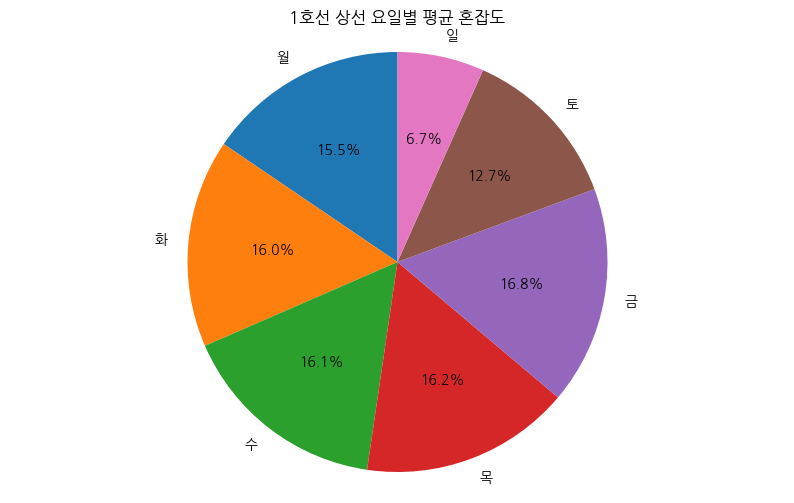

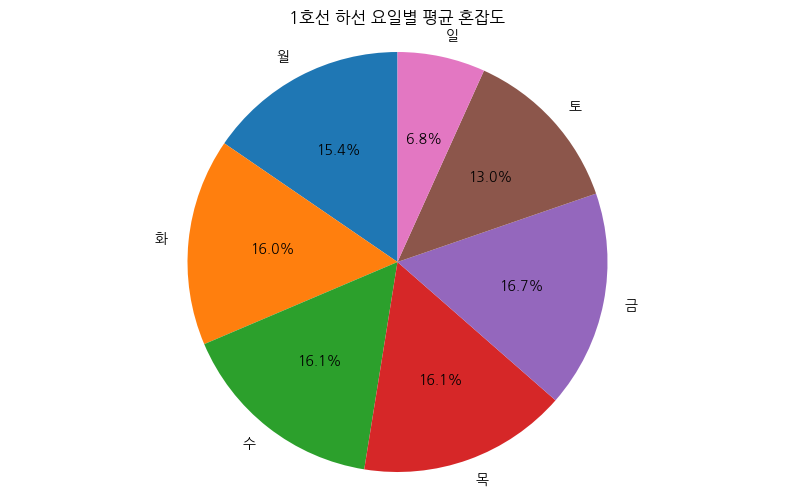

In [12]:
# 1호선 요일별 평균 혼잡도 데이터
days = ['월', '화', '수', '목', '금', '토', '일']
y_up = [27.382874999999995, 28.299354166666667, 28.506999999999998, 28.53404166666666, 29.653645833333336, 22.396875, 11.785666666666666]
y_down = [28.4416875, 29.39666666666667, 29.60902083333333, 29.638979166666672, 30.812083333333334, 23.8820625, 12.44375]

# 파이 차트로 표현 - 상선
plt.figure(figsize=(10, 6))
plt.pie(y_up, labels=days, autopct='%1.1f%%', startangle=90)
plt.title('1호선 상선 요일별 평균 혼잡도')
plt.axis('equal')  # 원형으로 만들어줌
plt.show()

# 파이 차트로 표현 - 하선
plt.figure(figsize=(10, 6))
plt.pie(y_down, labels=days, autopct='%1.1f%%', startangle=90)
plt.title('1호선 하선 요일별 평균 혼잡도')
plt.axis('equal')  # 원형으로 만들어줌
plt.show()

### (참고) 1호선 시간대별 평균 혼잡도 선 그래프

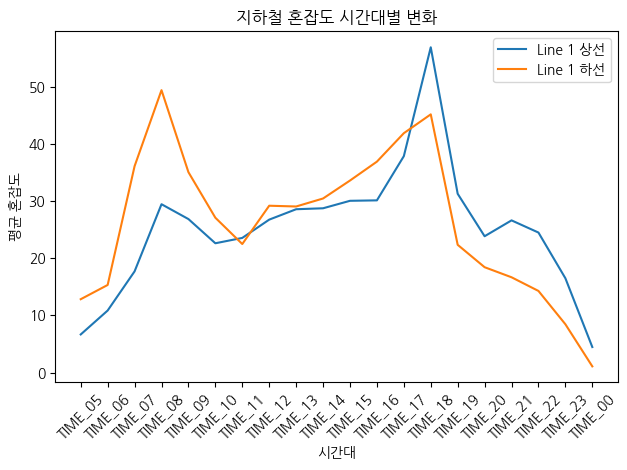

In [11]:
# 호선별 데이터
lines_data = {
    'Line 1': {
        'time_labels': ['TIME_05', 'TIME_06', 'TIME_07', 'TIME_08', 'TIME_09', 'TIME_10', 'TIME_11', 'TIME_12', 'TIME_13', 'TIME_14', 'TIME_15', 'TIME_16', 'TIME_17', 'TIME_18', 'TIME_19', 'TIME_20', 'TIME_21', 'TIME_22', 'TIME_23', 'TIME_00'],
        'congestion_up': [6.681904761904762, 10.870357142857143, 17.72452380952381, 29.48071428571428, 26.88113095238095, 22.644107142857145, 23.582023809523808, 26.782321428571425, 28.602857142857143, 28.77, 30.078154761904763, 30.155833333333334, 37.89339285714286, 56.95369047619048, 31.309226190476192, 23.87446428571429, 26.652321428571426, 24.520476190476188, 16.52029761904762, 4.477797619047619],
        'congestion_down': [12.851547619047619, 15.344940476190477, 36.14059523809524, 49.447500000000005, 35.08958333333333, 27.116666666666667, 22.51238095238095, 29.216666666666665, 29.083214285714288, 30.482976190476187, 33.62517857142857, 36.935, 41.914880952380955, 45.21214285714285, 22.374821428571426, 18.45375, 16.690952380952382, 14.298511904761904, 8.467976190476191, 1.0957142857142856]
    },
    # 나머지 호선에 대한 데이터도 추가
    # ...

}

# 각 호선별로 선 그래프 그리기
for line_name, line_data in lines_data.items():
    plt.plot(line_data['time_labels'], line_data['congestion_up'], label=f'{line_name} 상선')
    plt.plot(line_data['time_labels'], line_data['congestion_down'], label=f'{line_name} 하선')

# 그래프 제목 및 레이블 설정
plt.title('지하철 혼잡도 시간대별 변화')
plt.xlabel('시간대')
plt.ylabel('평균 혼잡도')
plt.legend()
plt.xticks(rotation=45)  # x축 눈금 라벨 회전
plt.tight_layout()

# 그래프 표시
plt.show()